In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
import xgboost as xgb

In [110]:
df = pd.read_csv('prepro_data/최종+재무제표.csv', index_col=0)

In [111]:
y = df.updown[5:]
x = df.drop(['date', 'updown'], axis=1)[:-5]
# x_de = df.drop(['updown', 'date'], axis=1)[:-5]
# x = x_de.loc[:, ['tesla', 'tesla_거래량', 'oli_price', 'EVE거래량', 'PSI종가']]

In [112]:
x_train = x[:1444]
x_test = x[1444:]
y_train = y[:1444]
y_test = y[1444:]

In [113]:
lg = LogisticRegression()
lgbm = LGBMClassifier()
xgbs = xgb.XGBClassifier()

models = [lgbm, xgbs]

for model in models:
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(model.__class__.__name__)
    print('accuracy_score :', accuracy_score(y_test, preds))
    print('f1_score :', f1_score(y_test, preds))
    print(classification_report(y_test, preds))


LGBMClassifier
accuracy_score : 0.5446927374301676
f1_score : 0.6733466933867736
              precision    recall  f1-score   support

           0       0.53      0.16      0.25       166
           1       0.55      0.88      0.67       192

    accuracy                           0.54       358
   macro avg       0.54      0.52      0.46       358
weighted avg       0.54      0.54      0.48       358

[12:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
accuracy_score : 0.5195530726256983
f1_score : 0.5763546798029556
              precision    recall  f1-score   support

           0       0.48      0.42      0.45       166
           1       0.55      0.61      0.58       192

    accuracy                           0.52       358
   macro avg       0.51      0.51      0.51       358
weighted avg       0.52      0.52      0.52       358



In [43]:
# confusion_matrix 시각화

In [44]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

In [226]:
cm = confusion_matrix(y_test, preds)
cm

array([[125,  41],
       [ 90, 102]], dtype=int64)

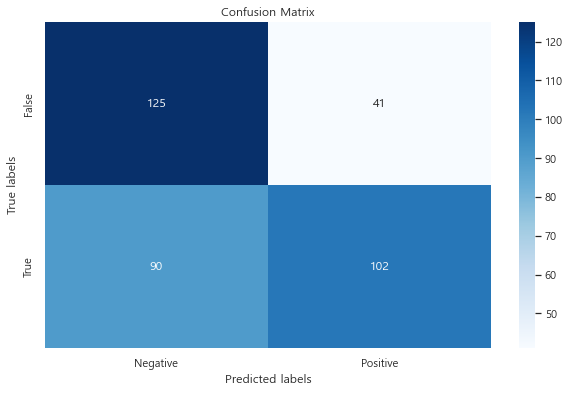

In [227]:
plt.figure(figsize=(10, 6)) 
plt.rcParams['font.family'] = 'Malgun Gothic'
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['False', 'True']);

In [72]:
len(df) * 0.8

1445.6000000000001

In [63]:
from itertools import combinations

In [64]:
columns_li = list(combinations(x.columns,5))

In [65]:
len(columns_li)

3819816

In [73]:
models = [lgbm, xgbs]

y = df.updown[5:]
y_train = y[:1444]
y_test = y[1444:]
best_accuracy_score = 0
best_f1_score = 0
for li in columns_li:
    x = df.loc[:, li][:-5]
    x_train = x[:1444]
    x_test = x[1444:]
    for model in models:
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        accuracy = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        print(model.__class__.__name__)
        print('f1_score :', f1)
        if accuracy >= best_accuracy_score:
            best_accuracy_score = accuracy
            best_accuracy_etstimate = li
            print('=' * 50)
            print('현재 best_accuracy_score :', best_accuracy_score)
            print('현재 best_accuracy_etstimate :', best_accuracy_etstimate)
            print('=' * 50)
        if f1 >= best_f1_score:
            best_f1_score = f1
            best_f1_etstimate = li
            print('=' * 50)
            print('현재 best_f1_score :', best_f1_score)
            print('현재 best_f1_etstimate :', best_f1_etstimate)
            print('=' * 50)

LGBMClassifier
f1_score : 0.5693430656934307
현재 best_accuracy_score : 0.505586592178771
현재 best_accuracy_etstimate : ('tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee', 'oli_price')
현재 best_f1_score : 0.5693430656934307
현재 best_f1_etstimate : ('tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee', 'oli_price')
[11:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
f1_score : 0.30597014925373134


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
f1_score : 0.6431535269709543
현재 best_accuracy_score : 0.5195530726256983
현재 best_accuracy_etstimate : ('tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee', 'oli_price_volatility')
현재 best_f1_score : 0.6431535269709543
현재 best_f1_etstimate : ('tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee', 'oli_price_volatility')
[11:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
f1_score : 0.6081081081081082


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
f1_score : 0.6846153846153847
현재 best_accuracy_score : 0.5418994413407822
현재 best_accuracy_etstimate : ('tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee', 'carbon_credits')
현재 best_f1_score : 0.6846153846153847
현재 best_f1_etstimate : ('tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee', 'carbon_credits')
[11:41:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
f1_score : 0.6587771203155819


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
f1_score : 0.6157303370786518
[11:41:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.4722222222222222
LGBMClassifier
f1_score : 0.6357894736842106
[11:41:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.3333333333333333
LGBMClassifier
f1_score : 0.6031746031746031
[11:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.631578947368421
LGBMClassifier
f1_score : 0.6553911205073996
현재 best_accuracy_score : 0.5446927374301676
현재 best_accuracy_etstimate : ('tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee', 'EVE변동률')
[11:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.5957446808510638
LGBMClassifier
f1_score : 0.6758349705304519
[11:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.6114649681528662
LGBMClassifier
f1_score : 0.6178489702517161
[11:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.5728643216080401
LGBMClassifier
f1_score : 0.5846867749419954
[11:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.5612244897959183
LGBMClassifier
f1_score : 0.602247191011236
[11:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.6153846153846153
LGBMClassifier
f1_score : 0.678030303030303
[11:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.6626262626262626
LGBMClassifier
f1_score : 0.6271929824561403
[11:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.5896805896805897
LGBMClassifier
f1_score : 0.6487603305785126
[11:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
f1_score : 0.6085011185682326
LGBMClassifier
f1_score : 0.6518218623481782


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KeyboardInterrupt: 

In [68]:
best_accuracy_score

0.5929368029739777

In [70]:
best_accuracy_etstimate

('tesla', 'tesla_거래량', 'oli_price_volatility', 'EVE거래량', 'PSI거래량')

In [69]:
best_f1_score

0.7006369426751592

In [71]:
best_f1_etstimate

('tesla', 'tesla_거래량', 'oli_price_volatility', 'cu_price', '자산총계')

In [55]:
df['alu_change']

0      -0.70
1      -0.42
2       0.23
3       0.12
4       0.01
        ... 
1802    0.33
1803    3.25
1804    2.62
1805    4.13
1806    3.57
Name: alu_change, Length: 1807, dtype: float64

In [228]:
y = df.updown[5:]
#x = df.drop(['date', 'updown'], axis=1)[:-5]
x_de = df.drop(['updown', 'date'], axis=1)[:-5]
x = x_de.loc[:, ['tesla', 'tesla_거래량', 'oli_price', 'EVE거래량', 'alu_change']]

In [237]:
x_train = x[:1444]
x_test = x[1444:]
y_train = y[:1444]
y_test = y[1444:]

In [238]:
lgbm = LGBMClassifier(num_iteration = 110, min_data_in_leaf=30, lambda_I1=100)
lgbm.fit(x_train, y_train)
preds = lgbm.predict(x_test)
print(lgbm.__class__.__name__)
print(lgbm.score(x_train, y_train))
print('accuracy_score :', accuracy_score(y_test, preds))
print('f1_score :', f1_score(y_test, preds))
print(classification_report(y_test, preds))

[LightGBM] [Warning] Unknown parameter: lambda_I1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=110, num_iteration=110 will be ignored. Current value: num_iterations=110
LGBMClassifier
0.9591412742382271
accuracy_score : 0.6340782122905028
f1_score : 0.6089552238805971
              precision    recall  f1-score   support

           0       0.58      0.75      0.66       166
           1       0.71      0.53      0.61       192

    accuracy                           0.63       358
   macro avg       0.65      0.64      0.63       358
weighted avg       0.65      0.63      0.63       358



C:\Users\bitcamp\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


1807

0.9591412742382271

In [207]:
lgbm.score(x_test, y_test)

0.6340782122905028